In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

In [3]:
ratings = pd.read_csv('rating.csv')
anime = pd.read_csv('anime.csv')

In [7]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


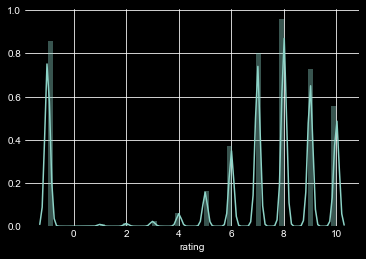

In [8]:
sns.distplot(ratings['rating'])

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


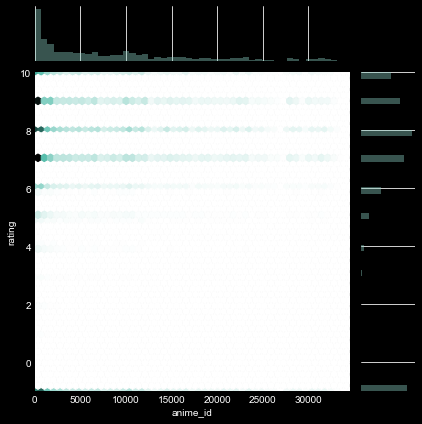

In [9]:
sns.jointplot(x=ratings['anime_id'], y=ratings['rating'], kind='hex')

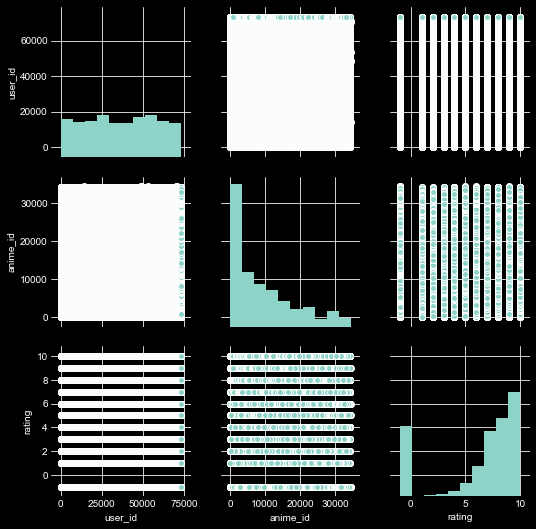

In [10]:
sns.pairplot(ratings)

In [11]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


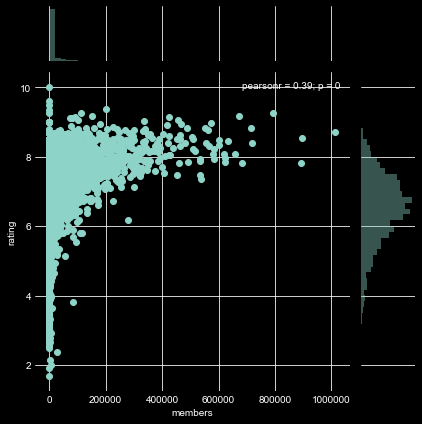

In [12]:
sns.jointplot(x=anime['members'], y=anime['rating'])

In [14]:
round(anime.describe(),2)

,anime_id,rating,members
count,12294.00,12064.00,12294.00
mean,14058.22,6.47,18071.34
std,11455.29,1.03,54820.68
min,1.00,1.67,5.00
25%,3484.25,5.88,225.00
50%,10260.50,6.57,1550.00
75%,24794.50,7.18,9437.00
max,34527.00,10.00,1013917.00


In [15]:
anime_pre = anime[anime['members'] > 10000]

In [19]:
anime_pre.isnull().sum()

anime_id     0
name         0
genre        2
type         4
episodes     0
rating      43
members      0
dtype: int64

In [27]:
anime_pre = anime_pre.dropna()

In [28]:
anime_pre.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [30]:
ratings_pre = ratings[ratings['rating'] >= 0]

In [33]:
ratings_pre.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [34]:
anime_pre.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [42]:
df = ratings_pre.merge(anime_pre, left_on='anime_id', right_on='anime_id', suffixes=['_user', ''])

In [43]:
df.head()

,user_id,anime_id,rating_user,name,genre,type,episodes,rating,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
3,12,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
4,14,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


In [44]:
round(df.describe(),2)

,user_id,anime_id,rating_user,rating,members
count,5957004.00,5957004.00,5957004.00,5957004.00,5957004.00
mean,36665.80,9023.38,7.87,7.74,196030.78
std,21030.91,8920.21,1.54,0.62,191317.96
min,1.00,1.00,1.00,2.37,10005.00
25%,18911.00,1195.00,7.00,7.35,57029.00
50%,36534.00,6500.00,8.00,7.74,130689.00
75%,54851.00,14345.00,9.00,8.17,271484.00
max,73516.00,34240.00,10.00,9.37,1013917.00


In [49]:
df_final = df[['user_id', 'name', 'rating_user']]

In [51]:
df_final[df_final.duplicated(['user_id', 'name'])]

,user_id,name,rating_user
48055,42653,Sword Art Online,5
444786,42653,Shingeki no Kyojin,8
523333,42653,Noragami,9
574060,42653,Tokyo Ghoul,6
2333282,42653,Code Geass: Hangyaku no Lelouch,6
3369716,42653,Tengen Toppa Gurren Lagann,10
3632134,42653,Zankyou no Terror,9


In [53]:
df_final[df_final['user_id']==42653]

,user_id,name,rating_user
48054,42653,Sword Art Online,8
48055,42653,Sword Art Online,5
71731,42653,Kuroko no Basket,7
130670,42653,Dragon Ball GT,10
167954,42653,Dragon Ball Z,10
288692,42653,Fullmetal Alchemist: Brotherhood,7
305791,42653,Fairy Tail,7
318436,42653,Deadman Wonderland,6
342715,42653,Ao no Exorcist,7
407856,42653,Zetsuen no Tempest,8


In [54]:
df_final_drop = df_final.drop_duplicates(['user_id', 'name'])

In [55]:
df_final_drop.head()

,user_id,name,rating_user
0,1,Highschool of the Dead,10
1,3,Highschool of the Dead,6
2,5,Highschool of the Dead,2
3,12,Highschool of the Dead,6
4,14,Highschool of the Dead,6


In [58]:
df_pivot = df_final_drop.pivot(index = 'name', columns='user_id', values='rating_user').fillna(0)

In [60]:
df_pivot.head()

user_id,1,2,3,5,7,8,9,10,11,12,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
csr_matrix?

In [62]:
df_csr = csr_matrix(df_pivot.values)

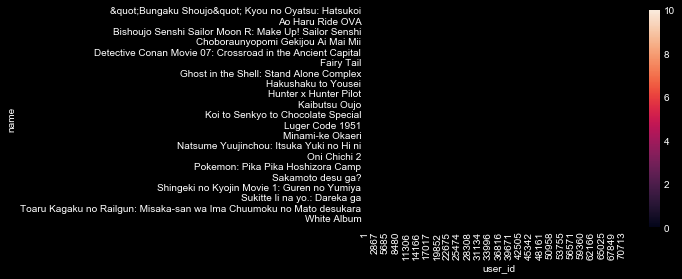

In [63]:
sns.heatmap(df_pivot)

In [64]:
def search_anime(string):
    print(df_pivot[df_pivot.index.str.contains(string)].index[0:])

In [65]:
search_anime('Dragon')

Index(['Blue Dragon', 'Chaos Dragon: Sekiryuu Seneki', 'Dragon Ball',
       'Dragon Ball GT',
       'Dragon Ball GT: Goku Gaiden! Yuuki no Akashi wa Suushinchuu',
       'Dragon Ball Kai', 'Dragon Ball Kai (2014)',
       'Dragon Ball Kai: Mirai ni Heiwa wo! Goku no Tamashii yo Eien ni',
       'Dragon Ball Movie 1: Shen Long no Densetsu',
       'Dragon Ball Movie 2: Majinjou no Nemuri Hime',
       'Dragon Ball Movie 3: Makafushigi Daibouken',
       'Dragon Ball Movie 4: Saikyou e no Michi', 'Dragon Ball Specials',
       'Dragon Ball Z', 'Dragon Ball Z Movie 01: Ora no Gohan wo Kaese!!',
       'Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsuyoi Yatsu',
       'Dragon Ball Z Movie 03: Chikyuu Marugoto Choukessen',
       'Dragon Ball Z Movie 04: Super Saiyajin da Son Gokuu',
       'Dragon Ball Z Movie 05: Tobikkiri no Saikyou tai Saikyou',
       'Dragon Ball Z Movie 06: Gekitotsu!! 100-oku Power no Senshi-tachi',
       'Dragon Ball Z Movie 07: Kyokugen Battle!! Sandai Super Sai

In [89]:
search_anime('Dora')

Index(['Doraemon (1979)'], dtype='object', name='name')


In [93]:
Anime = 'Doraemon (1979)'

In [94]:
knn = NearestNeighbors(n_neighbors=9, algorithm='brute', metric='cosine')
model_knn = knn.fit(df_csr)

In [95]:
distance, indice = model_knn.kneighbors(df_pivot.iloc[df_pivot.index==Anime].values.reshape(1,-1),n_neighbors=11)

In [96]:
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations if you like the anime {0}:\n'.format(df_pivot[df_pivot.index== Anime].index[0]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,df_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

Recommendations if you like the anime Doraemon (1979):

1: Captain Tsubasa with distance: 0.8709201800775657
2: Ojamajo Doremi with distance: 0.8807019129945259
3: Captain Tsubasa J with distance: 0.8855753681274506
4: Captain Tsubasa: Road to 2002 with distance: 0.8952036378019503
5: Keroro Gunsou with distance: 0.8955075872261801
6: Digimon Adventure with distance: 0.8962382943915018
7: Pokemon with distance: 0.8982942204783945
8: Digimon Adventure 02 with distance: 0.8993404816451508
9: Pokemon Advanced Generation with distance: 0.9023047185620648
10: Medarot with distance: 0.9027085491601127
